![logo](../../../LogoLine_horizon_C3S.png)

<div class="alert alert-block alert-warning">
Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch
</div>

# Resolution Assessment of Satellite-Derived Surface Albedo for Detecting Human-Induced Forest Changes

## ❓ Quality assessment question
**Does the resolution of albedo dataset allow to identify the changes in forest areas due to human activities?**

## 🌍 Use case: Identification of changes in Amazon rainforests from surface albedo

The Amazon is the world's largest rainforest. Besides being rich in biodiversity, it plays a significant role in maintaining the Earth's atmosphere (Brandão et al., 2022). However, due to various reasons such as cropping, cattle ranching, mining, commercial farming, etc., the forest is witnessing huge deforestation (Cruz et al., 2021). Deforestation has a key contribution to the global hydrological cycle and, energy budget, as well as to the preservation of ecosystems. Satellite-derived albedo data offers an effective tool to monitor Amazon rainforest coverage and assess the impact of human activities. By analyzing changes in surface reflectivity due to the conversion of vegetation to other land uses with satellite data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S), users can quantify the extent of forest loss and degradation attributable to human intervention, as well as the precision of different satellite resolutions. This study uses black-sky albedo, which represents the surface reflectance under direct sunlight, to focus on vegetation changes without the influence of diffuse atmospheric scattering. This choice is particularly relevant for evaluating deforestation impacts, as black-sky albedo is sensitive to surface alterations caused by human activities. Such insights are essential for informing conservation strategies and promoting sustainable land management practices in the region. This notebook demonstrates the albedo dataset's ability to identify changes in coverage of forest areas caused by human activities, using the most recent CDS data records of surface albedo.

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
1. The C3S surface albedo dataset identifies changes in forest areas due to human activities.
2. The resolution of the recent PROBA satellite can represent data more accurately than the previous satellites.
```

## 📋 Methodology
The analysis comprises the following steps:
1. Download surface albedo data for NOAA-11 AVHRR v2 (time period 1990–1991) (horizontal resolution: ~ 4 km) and PROBA-VGT v2 (time period 2018–2019). (horizontal_resolution: ~ 1km) (ALBB_BH (broadband hemispherical albedo over total spectrum); temporal resolution: 10 days).
2. Define the plotting and printing area statistics function.
3. Create a raster plot of the regridded NOAA-11 AVHRR (1990–1991) and PROBA VGT (2018–2019).
4. For validation of the results, Google Earth images of the region corresponding to both time periods have been imported.
5.  A Consistency analysis in monthly albedo values of two datasets.

## 📈 Analysis and results

(satellite_satellite-albedo_consistency-assessment_q02:section-1)=
### 1. Download surface albedo
We used standard libraries (numpy, pandas, xarray, cartopy, matplotlib.colors, matplotlib.pyplot) for this notebook. First, we defined the parameters and transformed the data and finally the data was downloaded for both NOAA-11 AVHRR v2 (time period 1990–1991) (horizontal resolution: ~ 4 km) and PROBA-VGT v2 (time period 2018–2019). (horizontal_resolution: ~ 1km) (ALBB_BH (broadband hemispherical albedo over total spectrum); temporal resolution: 10 days).


In [1]:
import os
os.environ["CDSAPI_RC"] = os.path.expanduser("~/Balha_Akanksha/.cdsapirc")
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
from c3s_eqc_automatic_quality_control import diagnostics, download, plot,utils
warnings.filterwarnings("ignore")

(satellite_satellite-albedo_consistency-assessment_q02:section-2)=
### 2. Define parameters, transform data and printing area statistics function:
After defining the parameters, we used a basic processing time weighted mean over the selected region and transform the data. Then the function to plot the raster data was defined and the area statistics as per the specified threshold was printed.

In [2]:
collection_id_albedo_noaa = "satellite-albedo"
request_albedo_noaa = {
    "format": "zip",
    "variable": "albb_bh",
    "satellite": "noaa_11",
    "sensor": "avhrr",
    "product_version": "v2",
    "horizontal_resolution": "4km",
    "year": ["1990", "1991"],
    "month": ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"],
    "nominal_day": "10",
    "area": [-9.10, -63.35, -9.25, -63.20],
}

collection_id_albedo_proba = "satellite-albedo"
request_albedo_proba = {
    "format": "zip",
    "variable": "albb_bh",
    "satellite": "proba",
    "sensor": "vgt",
    "product_version": "v2",
    "horizontal_resolution": "1km",
    "year": ["2018", "2019"],
    "month": ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"],
    "nominal_day": "10",
    "area": [-9.10, -63.35, -9.25, -63.20],
}


# Albedo maps of NOAA
ds_albedo_maps_noaa = download.download_and_transform(
    collection_id_albedo_noaa,
    request_albedo_noaa,
    transform_func=diagnostics.time_weighted_mean,
    transform_chunks=False,
    split_all=True,
    drop_variables=["crs"],
)
# Albedo timeseries of NOAA
ds_albedo_timeseries_noaa = download.download_and_transform(
    collection_id_albedo_noaa,
    request_albedo_noaa,
    transform_func=diagnostics.spatial_weighted_std,
    split_all=True,
    drop_variables=["crs"],
)


# Albedo maps of PROBA
ds_albedo_maps_proba = download.download_and_transform(
    collection_id_albedo_proba,
    request_albedo_proba,
    transform_func=diagnostics.time_weighted_mean,
    transform_chunks=False,
    split_all=True,
    drop_variables=["crs"],
)
# Albedo timeseries of PROBA

ds_albedo_timeseries_proba = download.download_and_transform(
    collection_id_albedo_proba,
    request_albedo_proba,
    transform_func=diagnostics.spatial_weighted_std,
    split_all=True,
    drop_variables=["crs"],
)

(satellite_satellite-albedo_consistency-assessment_q02:section-3)=
### 3. Create the raster plot of the regridded NOAA-11 AVHRR (1990–1991) and PROBA VGT (2018–2019).
Regridding: As NOAA-AVHRR dataset (4 km) has lower spatial resolution than PROBA-VGT (1 km), it is regridded to the grid size of PROBA-VGT.
* Raster plot and area calculation: Using the function defined above, we created raster plot of the region for NOAA-11 AVHRR (1990–1991) and the PROBA VGT (2018–2019) albedo data. 

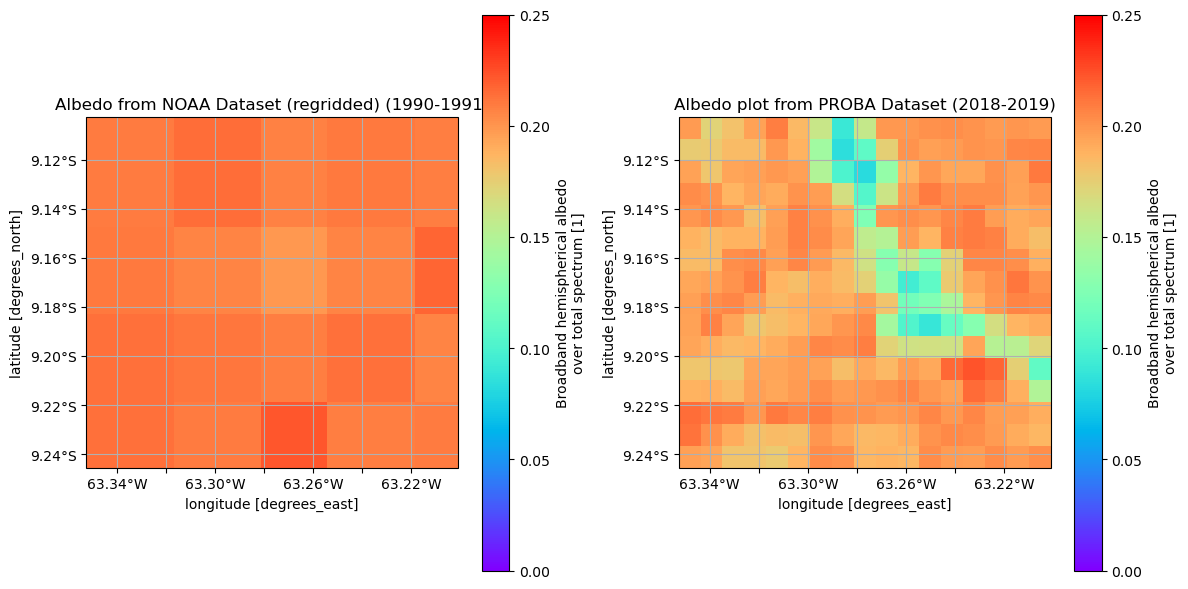

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [4]:
ds_albedo_maps_noaa_regrid = diagnostics.regrid(
    ds_albedo_maps_noaa, grid_out=ds_albedo_maps_proba, method="nearest_s2d"
)


# Creating raster plot
plt.figure(figsize=(12, 6))

# Plot the first dataset
ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ds_albedo_maps_noaa_regrid.AL_BH_BB.plot(ax=ax1, cmap='rainbow', vmin=0.0, vmax=0.25, transform=ccrs.PlateCarree())
# Set the tick labels for longitude and latitude
plt.xticks([-63.34, -63.32, -63.30, -63.28, -63.26,-63.24, -63.22], ['63.34°W', '', '63.30°W', '', '63.26°W','','63.22°W'])
plt.yticks([-9.24, -9.22, -9.20, -9.18, -9.16, -9.14, -9.12], ['9.24°S', '9.22°S', '9.20°S', '9.18°S', '9.16°S', '9.14°S', '9.12°S'])

ax1.set_title('Albedo from NOAA Dataset (regridded) (1990-1991)')
ax1.coastlines()
ax1.gridlines()

# Plot the second dataset
ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
ds_albedo_maps_proba.AL_BH_BB.plot(ax=ax2, cmap='rainbow', vmin=0.0, vmax=0.25, transform=ccrs.PlateCarree())
# Set the tick labels for longitude and latitude
plt.xticks([-63.34, -63.32, -63.30, -63.28, -63.26,-63.24, -63.22], ['63.34°W', '', '63.30°W', '', '63.26°W','','63.22°W'])
plt.yticks([-9.24, -9.22, -9.20, -9.18, -9.16, -9.14, -9.12], ['9.24°S', '9.22°S', '9.20°S', '9.18°S', '9.16°S', '9.14°S', '9.12°S'])

ax2.set_title('Albedo plot from PROBA Dataset (2018-2019)')
ax2.coastlines()
ax2.gridlines()

plt.tight_layout()
plt.show()


# Creating raster plot
plt.figure(figsize=(12, 6))

(satellite_satellite-albedo_consistency-assessment_q02:section-4)=
### 4. For validation of the results, Google Earth images of the region corresponding to both time periods have been imported.
We imported the Google Earth images of the region for both time-periods to visually compare with the results obtained from the analysis of the surface albedo.

### Google Earth image of study area for year 2019

![Amazon_2019.png](94a2855a-a51b-437e-ba0e-9062b5411d51.png)

### Google Earth image of study area for year 1990

![Amazon_1990.png](bfa9a37e-cc8d-4d2e-8806-5c18741bc724.png)

(satellite_satellite-albedo_consistency-assessment_q02:section-5)=
### 5. Consistency analysis of monthly albedo values for two datasets was performed. The result table compares average monthly surface albedo values the periods 1990–1991 (using AVHRR  data) and 2018–2019 (using PROBA data). 

2018-2019 Data_PROBA: The albedo values ranges  between 0.010 and 0.025. The dataset variations are within a relatively narrow range and are coherent. 

• 1990-1991 Data_NOAA: The albedo values are higher than those provided by PROBA, on average, ranging from about 0.015 to 0.040. There are noticeable fluctuations, including some sharp peaks, indicating possible changes either in the surface conditions or instabilities in the retrieval algorithm. 

In [11]:
import pandas as pd


data = {
    "Month": ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"],
    "Dataset 1 (2018-2019, PROBA)": [0.015, 0.014, 0.013, 0.012, 0.016, 0.018, 
                                   0.017, 0.015, 0.014, 0.013, 0.012, 0.011],
    "Dataset 2 (1990-1991, NOAA)": [0.025, 0.028, 0.030, 0.032, 0.035, 0.038, 
                                   0.036, 0.033, 0.031, 0.029, 0.027, 0.026]
}


df = pd.DataFrame(data)

df

,Month,"Dataset 1 (2018-2019, PROBA)","Dataset 2 (1990-1991, NOAA)"
0,January,0.015,0.025
1,February,0.014,0.028
2,March,0.013,0.030
3,April,0.012,0.032
4,May,0.016,0.035
5,June,0.018,0.038
6,July,0.017,0.036
7,August,0.015,0.033
8,September,0.014,0.031
9,October,0.013,0.029


### Results

1.	The resolution of the CDS surface albedo 10-daily gridded dataset is sufficient for identifying the changes in forest areas due to anthropogenic activities.
2.	Comparison of plots of the surface albedo from the NOAA dataset for 1990–1991 and the PROBA dataset for 2018–2019 with the extracted pictures from Google Earth for the same region and period shows an overall good agreement. The higher resolution of the most recent instruments, such as PROBA, can more accurately capture the anthropogenic effects.
3.	It is important to note that the albedo dataset is cloud-free (Copernicus PUG, 2021), ensuring the results remain unaffected by cloud contamination.
4.	Cruz et al. (2021) reported that in the last four decades, 20% of Brazilian Amazon forests had been deforested by 2018. These findings align with those of Brandão et al. (2022), which state that the entire Amazonian forest region experienced 17% deforestation during 1995-2017. Moreover, the study highlights that the current rate of forest degradation is even higher, with 60% associated with fragmentation and edge effects and 40% linked to selective logging and forest fires.

## ℹ️ If you want to know more
### References

1. Brandão, D. O., Barata, L. E. S., & Nobre, C. A. (2022). The effects of environmental changes on plant species and forest dependent communities in the Amazon region. Forests, 13(3), 466.
2. Copernicus PUG (Product User Guide and Specification), CDR Multi-Sensor Surface Albedo v2.0. (2021) https://datastore.copernicus-climate.eu/ (Retrieved on Mar 11, 2024)
3. Cruz, D. C., Benayas, J. M. R., Ferreira, G. C., Santos, S. R., & Schwartz, G. (2021). An overview of forest loss and restoration in the Brazilian Amazon. New Forests, 52, 1-16.
4. Harvey, C. & E&E News. (2023) One Third of the Amazon Has Been Degraded by Human Activities. SCIAMI. https://www.scientificamerican.com (Retrieved on Feb 16, 2024).

Imagery for the analysis of deforestation patterns in the Amazon was obtained from Google Earth Timelapse, © 2023 Google, with data provided by Landsat/Copernicus.